# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version
- <font color= red> If you have older version fetching the data might be different  </font>


In [1]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784',as_frame=False,parser='auto')
x, y = mnist["data"], mnist["target"]

#### peek at one digit

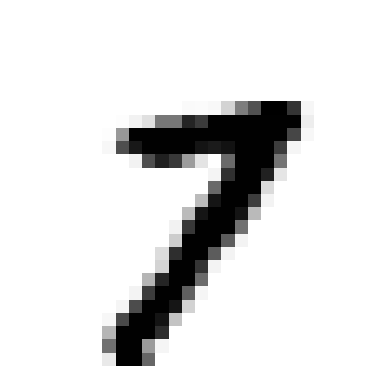

In [2]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [3]:
import numpy as np
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [4]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [5]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance

In [6]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores.round(8)


array([[-57845.26741278,  -9561.64306952, -17599.53414946,
         -7085.55845485, -15490.8143221 , -24074.91008461,
        -58788.71797726,  11010.27766481, -13246.00247981,
         -3790.29431071]])

#### find highest score

In [7]:
class_id = some_digit_scores.argmax()
class_id

7

#### list the target classes

In [8]:
sgd_clf.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [9]:
sgd_clf.classes_[class_id]


'7'

#### Force ScikitLearn to use one-versus-one

In [10]:
from sklearn.multiclass import OneVsOneClassifier

In [11]:
ovr_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(x_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array(['7'], dtype=object)

#### find how many classifier OvO used

In [12]:
len(ovr_clf.estimators_)

45

#### Train  RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [14]:
forest_clf.fit(x_train[:2000], y_train[:2000])
forest_clf.predict([some_digit])

array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [15]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.04, 0.02, 0.05, 0.1 , 0.02, 0.01, 0.66, 0.03, 0.07]])

#### Find accurcy using cross validation score ()

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(sgd_clf, x_train, y_train, cv=3,scoring="accuracy")

array([0.8769 , 0.87515, 0.84955])

#### to get better accurcy try scaling input

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3,scoring="accuracy")


array([0.8967 , 0.90155, 0.90885])

## Error Analysis

#### Take a look at the confusion matrix

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [21]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled,y_train, cv=3)
confusion_ma=confusion_matrix(y_train,y_train_pred)

In [22]:
confusion_ma

array([[5598,    0,   14,   10,    9,   39,   34,    7,  211,    1],
       [   0, 6404,   42,   25,    3,   44,    5,    9,  203,    7],
       [  23,   27, 5251,   99,   73,   28,   67,   41,  340,    9],
       [  25,   18,  113, 5279,    1,  204,   27,   41,  358,   65],
       [  11,   14,   40,   13, 5266,    8,   34,   20,  288,  148],
       [  25,   17,   33,  160,   52, 4495,   79,   15,  484,   61],
       [  27,   14,   51,    3,   41,   90, 5564,    4,  124,    0],
       [  20,   12,   54,   26,   50,   13,    4, 5733,  148,  205],
       [  15,   65,   40,  105,    2,  118,   32,    9, 5419,   46],
       [  28,   20,   26,   68,  132,   35,    1,  178,  328, 5133]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

<ipython-input-23-3ecfd1daef6d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(confusion_ma, cmap=plt.cm.get_cmap('gray'))


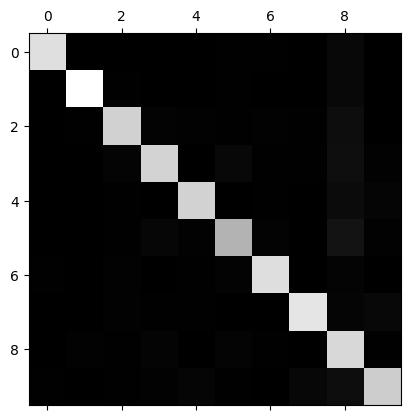

In [23]:
import matplotlib.pyplot as plt

plt.matshow(confusion_ma, cmap=plt.cm.get_cmap('gray'))
plt.show()


#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [24]:
row_sums = confusion_ma.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_ma / row_sums

#### fill the diagonal with zeros to keep only the errors

<ipython-input-25-a15912dd98c7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.matshow(confusion_array, cmap=plt.cm.get_cmap('gray'))


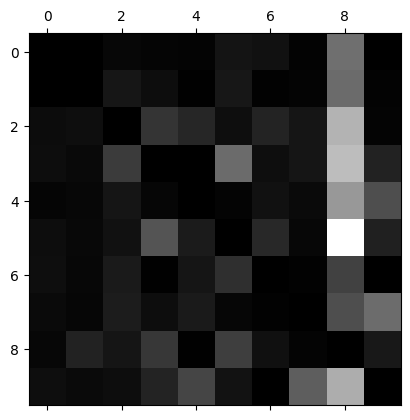

In [25]:
import numpy as np
import matplotlib.pyplot as plt

confusion_array = np.array(confusion_ma)

np.fill_diagonal(confusion_array, 0)

plt.matshow(confusion_array, cmap=plt.cm.get_cmap('gray'))

plt.show()


In [26]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

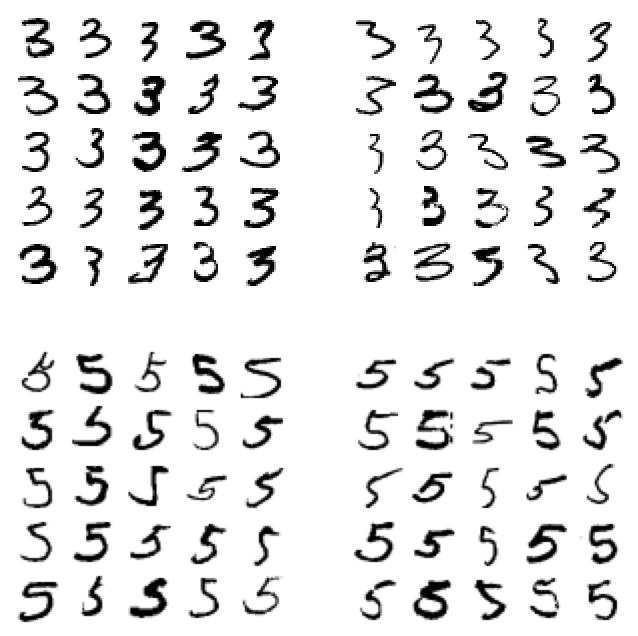

In [27]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [28]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [29]:
knn_clf.predict([some_digit])

array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [30]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9684336889030654

## Multioutput Classification


In [31]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

In [32]:
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test


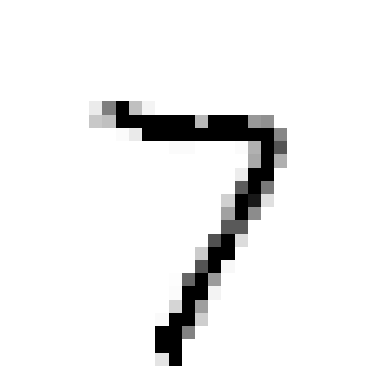

In [33]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)
plt.show()


# Congrats you've finished your first classification Project🥳 !
# #shAI_Club